### Data Preprocessing:

* Data Cleaning
    * missing values
    * duplicate values
    * drop values
    * outliers
* DataScaling
    * StandardScaler(Z-scaler)
    * MinMaxScaler
    * Normalization
    * RobustScale
* Data Encode
    * LabelEncoder 
    * get_dummies

### Outliers:

> Outliers is nothing but it is a data point that is further away from the other data points

#### DataScale
* StandardScaler(z-scale)
* MinMaxScaler
* Normalization
* RobustScaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Datasets\Advertisement.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# find the shape for how many rows and how many columns
df.shape

(200, 4)

In [4]:
# find the null values or not
df.isnull().sum()
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
# find the data types of datset
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
# find the table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# describe the dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# find the correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [13]:
# print the random rows in dataset
df.sample(5)

,TV,radio,newspaper,sales
15,195.4,47.7,52.9,22.4
41,177.0,33.4,38.7,17.1
71,109.8,14.3,31.7,12.4
88,88.3,25.5,73.4,12.9
83,68.4,44.5,35.6,13.6


C:\Users\Kanakamma\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


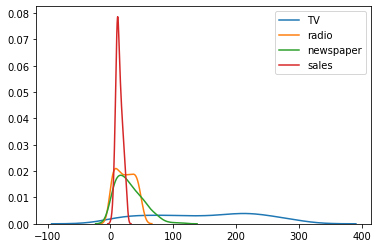

In [14]:
# KDE plot (Kernal Dencity Estimate plot)

import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df['TV'])
sns.kdeplot(df['radio'])
sns.kdeplot(df['newspaper'])
sns.kdeplot(df['sales'])

plt.show()


In [17]:
# StandardScaler => It is data preprocessing technique for scale the data in one range
# It is used for scalling mean and median
# xnew=(x-mean)/std

from sklearn.preprocessing import StandardScaler
sobj=StandardScaler()
sdata=sobj.fit_transform(df)
#sdata
sdf=pd.DataFrame(sdata,columns=df.columns)
sdf.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


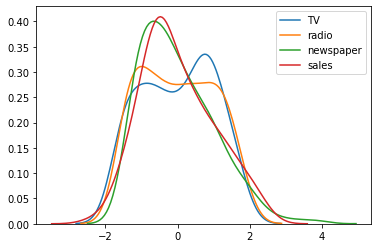

In [18]:
sns.kdeplot(sdf['TV'])
sns.kdeplot(sdf['radio'])
sns.kdeplot(sdf['newspaper'])
sns.kdeplot(sdf['sales'])

plt.show()

In [20]:
# Robust Scaling
# it scaling using medain and IQR
from sklearn.preprocessing import RobustScaler
r=RobustScaler()
rd=r.fit_transform(df)
#rdf
rdf=pd.DataFrame(rd,columns=df.columns)
rdf.head()

,TV,radio,newspaper,sales
0,0.556248,0.561205,1.343122,1.309609
1,-0.728626,0.617702,0.598145,-0.355872
2,-0.917619,0.866290,1.346213,-0.512456
3,0.012115,0.693032,1.012365,0.797153
4,0.214953,-0.455744,1.009274,0.000000


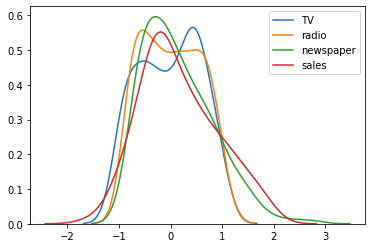

In [21]:
sns.kdeplot(rdf['TV'])
sns.kdeplot(rdf['radio'])
sns.kdeplot(rdf['newspaper'])
sns.kdeplot(rdf['sales'])
plt.show()

In [27]:
# MINMAX scaler(RangeScaling)
# In minmax scaling user can provide a range
# xnew=x-xmin/xmax-xmin

from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler(feature_range=(-1,1))
mdata=m.fit_transform(df)
mdf=pd.DataFrame(mdata,columns=df.columns)
mdf.head()

,TV,radio,newspaper,sales
0,0.551573,0.524194,0.211961,0.614173
1,-0.703754,0.584677,-0.211961,-0.307087
2,-0.888400,0.850806,0.213720,-0.393701
3,0.019953,0.665323,0.023747,0.330709
4,0.218126,-0.564516,0.021988,-0.110236


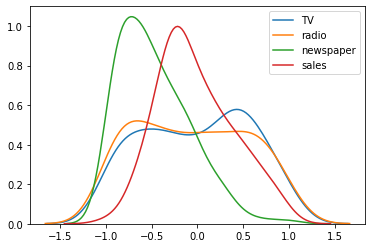

In [28]:
sns.kdeplot(mdf['TV'])
sns.kdeplot(mdf['radio'])
sns.kdeplot(mdf['newspaper'])
sns.kdeplot(mdf['sales'])
plt.show()

In [30]:
# Normalization
from sklearn.preprocessing import Normalizer
n=Normalizer()
ndata=n.fit_transform(df)
ndf=pd.DataFrame(ndata,columns=df.columns)
ndf.head()

,TV,radio,newspaper,sales
0,0.942116,0.154767,0.283331,0.090486
1,0.591135,0.522059,0.599106,0.138153
2,0.201426,0.537527,0.811561,0.108911
3,0.898632,0.244974,0.346997,0.109734
4,0.947881,0.056621,0.306174,0.067631


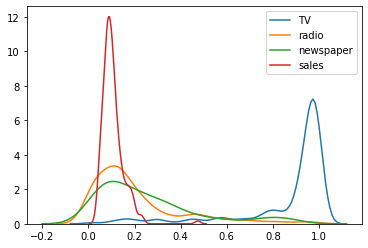

In [31]:
sns.kdeplot(ndf['TV'])
sns.kdeplot(ndf['radio'])
sns.kdeplot(ndf['newspaper'])
sns.kdeplot(ndf['sales'])
plt.show()

### Data Encoding

* Label Encoder
* getdummies

In [48]:
d={'sno':[101,102,103,104,105,106],
  'gender':['Male','Female','Male','Male','Female','Male'],
   'grade':['P','F','P','P','P','F']
  }
df=pd.DataFrame(d)
df

,sno,gender,grade
0,101,Male,P
1,102,Female,F
2,103,Male,P
3,104,Male,P
4,105,Female,P
5,106,Male,F


In [49]:
from sklearn.preprocessing import LabelEncoder
lobj=LabelEncoder()
df['gender']=lobj.fit_transform(df['gender'])
df

,sno,gender,grade
0,101,1,P
1,102,0,F
2,103,1,P
3,104,1,P
4,105,0,P
5,106,1,F


In [50]:
lobj.classes_

array(['Female', 'Male'], dtype=object)

In [47]:
#pd.get_dummies(df['grade'])
pd.get_dummies(df)

,sno,gender,grade_F,grade_P
0,101,1,0,1
1,102,0,1,0
2,103,1,0,1
3,104,1,0,1
4,105,0,0,1
5,106,1,1,0


In [37]:
df=pd.read_csv('Datasets\Automobile_data.csv')
df.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
76,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389
89,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
153,0,77,toyota,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649
105,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
94,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7299
127,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845


In [38]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [39]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [40]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
lobj=LabelEncoder()
df['fuel-type']=lobj.fit_transform(df['fuel-type'])
df.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,1,?,alfa-romero,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
116,0,161,peugot,0,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.00,95,4150,28,33,17950
132,3,150,saab,1,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850
191,0,?,volkswagen,1,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.4,8.50,110,5500,19,24,13295
179,3,197,toyota,1,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.30,161,5200,19,24,15998
44,1,?,isuzu,1,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,?
161,0,91,toyota,1,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.00,70,4800,28,34,8358
43,0,?,isuzu,1,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.50,78,4800,24,29,6785
117,0,161,peugot,1,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.00,142,5600,18,24,18150
90,1,128,nissan,0,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.90,55,4800,45,50,7099


In [42]:
lobj.classes_

array(['diesel', 'gas'], dtype=object)